This creates TFIDF and SVD for different `n_gram` and `n_components` parameters and stores them as pickle files

In [2]:
# Import install helper
import sys, os
# Add root to path
sys.path.append(os.path.dirname(sys.path[0]))
#from common.install import upgrade, install_package, install_requirements

In [2]:
upgrade("pip")
install_package("scikit-learn", "0.23.2")

In [1]:
import glob
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [2]:
# Read from wikipedia dataset
# This stores each of the paragraphs as a single entry (document)
token_text = []
token_data_path = 'text_4_sample_test.txt'
files = glob.glob(token_data_path)
for f in files:
    with open(f, "r") as file:
        lines = file.readlines()
    for line in lines:
        if not line.startswith("<") and len(line.strip()) > 0:
            token_text.append(line.strip())
print("Total paragraphs:", len(token_text))

Total paragraphs: 2185


In [3]:
def embeddings(txt_data, svd=True, n_components=300, n_iter=10, char_ngram=None):
    tsvd = None
    if char_ngram:
        tfidf = TfidfVectorizer(analyzer='char', ngram_range=char_ngram)
    else:
        tfidf = TfidfVectorizer()
    temp_text = tfidf.fit_transform(txt_data)
    if svd:
        tsvd = TruncatedSVD(n_components=n_components, n_iter=n_iter)
        temp = tsvd.fit_transform(temp_text)
    return tfidf, tsvd

In [4]:
# Parameters

n_grams = [2, 3, 4]
n_components_list = [100, 200, 300, 500]

In [6]:
for n_gram in n_grams:
    for n_components in n_components_list:
        tfidf, svd = embeddings(token_text, char_ngram=(n_gram,n_gram), n_components=n_components)

        with open('tfidf/' + str(n_gram) + 'gram_'+ str(n_components) +'_tfidf.pickle', 'wb') as handle:
            pickle.dump({
                'tfidf': tfidf
            }, handle, protocol=pickle.HIGHEST_PROTOCOL)

        with open('tfidf/' + str(n_gram) + 'gram_'+ str(n_components) +'_svd.pickle', 'wb') as handle:
            pickle.dump({
                'svd': svd
            }, handle, protocol=pickle.HIGHEST_PROTOCOL)

Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.


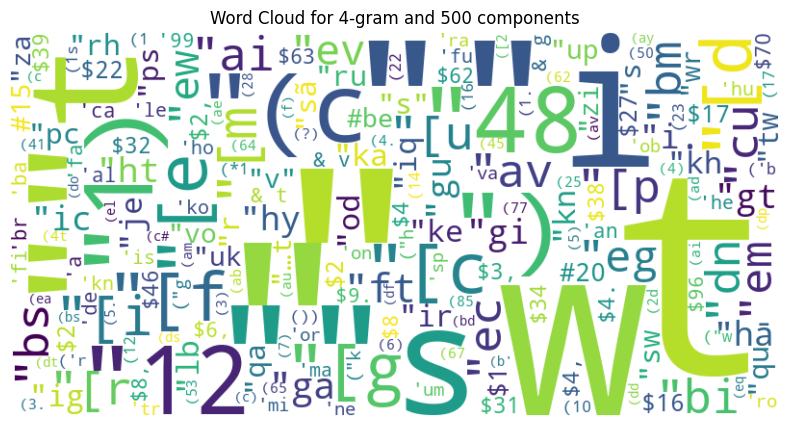

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

feature_names = tfidf.get_feature_names_out()
scores = tfidf.idf_
word_scores = {word: score for word, score in zip(feature_names, scores)}
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_scores)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud for {n_gram}-gram and {n_components} components')
plt.show()